# Imports

In [1]:
import numpy as np
import dask.dataframe as dd
from dask.distributed import Client
client = Client()  # start distributed scheduler locally.  Launch dashboard
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [3]:
column_types = {
    'bert': str,
    'hashtags': str,
    'tweet_id': str,
    'media': str,
    'links': str,
    'domains': str,
    'type': str,
    'language': str,
    'timestamp': np.uint32,
    'AUTHOR_user_id': str,
    'AUTHOR_follower_count': np.uint32,
    'AUTHOR_following_count': np.uint32,
    'AUTHOR_verified': bool,
    'AUTHOR_account_creation': np.uint32,
    'INTERACTOR_user_id': str,
    'INTERACTOR_follower_count': np.uint32,
    'INTERACTOR_following_count': np.uint32,
    'INTERACTOR_verified': bool,
    'INTERACTOR_account_creation': np.uint32,
    'AUTHOR_follows_INTERACTOR': bool,
    'reply_timestamp': 'Int32',
    'retweet_timestamp': 'Int32',
    'quote_timestamp': 'Int32',
    'like_timestamp': 'Int32'
}

df = dd.read_csv('sample/train_part-*',
                 names=list(column_types.keys()),
                 header=0,
                 sep=',',
                 dtype=column_types)
df.head()

,bert,hashtags,tweet_id,media,links,domains,type,language,timestamp,AUTHOR_user_id,...,INTERACTOR_user_id,INTERACTOR_follower_count,INTERACTOR_following_count,INTERACTOR_verified,INTERACTOR_account_creation,AUTHOR_follows_INTERACTOR,reply_timestamp,retweet_timestamp,quote_timestamp,like_timestamp
0,101\t56898\t137\t11783\t40825\t30832\t131\t248...,NaN,2FCFEA2661EDA3C3F3001A88EBFF19AE,NaN,NaN,NaN,Retweet,488B32D24BD4BB44172EB981C1BCA6FA,1612398390,D6CEEB156EF994594ADB318AFB29C994,...,A9E4E000DB7BDD87635A35528975A52D,670,250,False,1321581661,True,<NA>,<NA>,<NA>,<NA>
1,101\t47821\t30455\t23200\t13096\t10142\t10106\...,NaN,FD9F6F01E3DF352E0E46CDE43D80C0CA,NaN,NaN,NaN,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1612398934,7579B6A157E965E68839938C6F27C717,...,3669C3300C71A6FC09553061C7863415,199,896,False,1212989004,False,<NA>,<NA>,<NA>,1612403200
2,101\t146\t65000\t100\t188\t69110\t10136\t10435...,NaN,EDE3281757D0B359CD36C4FDB8D1A417,NaN,NaN,NaN,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1612397895,BCE4EB1ADE0B7240B408A6307741C01D,...,57552E50289A30F9AD6E44934033D218,2142,1456,False,1340229176,True,<NA>,<NA>,<NA>,1612402400
3,101\t100\t14120\t131\t120\t120\t188\t119\t1117...,NaN,E868BA29C8690700C28AD29364704D76,Photo,NaN,NaN,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1612399189,53233A53F1DF14908FBCA96EBA6C0712,...,B23F678A062B7F289BAE5956A8546B90,1565,144,False,1570416644,False,1612402000,<NA>,<NA>,1612402000
4,101\t10841\t11337\t32560\t161\t10840\t15772\t1...,NaN,266DCA26093CA5D5DF952B84A8AC8C8D,Photo,NaN,NaN,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1612399230,5DF93364C80554D4EA3FB238CA6CEB01,...,A38A2B0F8693BC5FE608B9B6D1EEAB11,530,393,False,1488181494,True,<NA>,<NA>,<NA>,1612399400


In [11]:
df = df.compute()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

## Distribution of the languages

In [8]:
languages = df.groupby("language").count()["tweet_id"].compute()

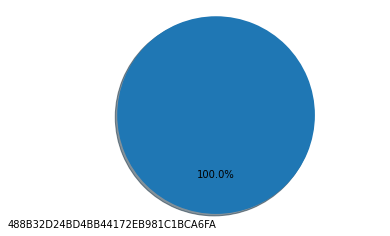

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(languages.index.values)
sizes = list(languages.values)
explode = (0 for i in range(len(languages.index.values)))  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Small class problem?

### Reply

In [12]:
negative_reply = df[df['reply_timestamp'].isna()].shape[0]
positive_reply = df[~df['reply_timestamp'].isna()].shape[0]

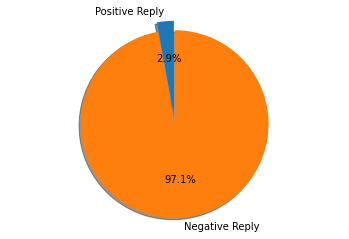

In [13]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Reply', 'Negative Reply'
sizes = [positive_reply, negative_reply]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

###  Retweet

In [14]:
negative_retweet = df[df['retweet_timestamp'].isna()].shape[0]
positive_retweet = df[~df['retweet_timestamp'].isna()].shape[0]

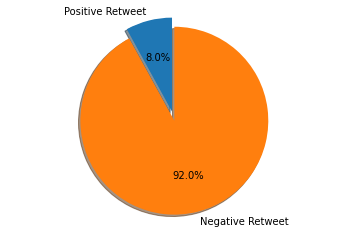

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Retweet', 'Negative Retweet'
sizes = [positive_retweet, negative_retweet]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Like

In [16]:
negative_like = df[df['like_timestamp'].isna()].shape[0]
positive_like = df[~df['like_timestamp'].isna()].shape[0]

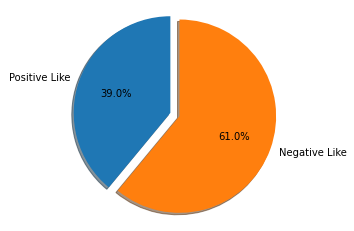

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Like', 'Negative Like'
sizes = [positive_like, negative_like]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Retweet + Comment (Quote)

In [18]:
negative_retweet_comment = df[df['quote_timestamp'].isna()].shape[0]
positive_retweet_comment = df[~df['quote_timestamp'].isna()].shape[0]

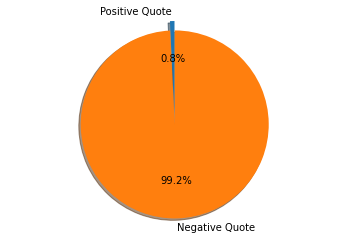

In [19]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive Quote', 'Negative Quote'
sizes = [positive_retweet_comment, negative_retweet_comment]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Distribution along the day of the week

In [75]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm

week_days = {
    0: "monday",
    1: "tuesday",
    2: "wednesday",
    3: "thursday",
    4: "friday",
    5: "saturday",
    6: "sunday"
}

def create_datetime(df):
    tqdm.pandas()
    df["datetime_tweet_creation"] = df["timestamp"].progress_apply(lambda x: pd.to_datetime(x, unit='s'))
    df["weekday_tweet_creation"] = df["datetime_tweet_creation"].progress_apply(lambda x: x.weekday())
    return df

In [74]:
df = create_datetime(df)

100%|████████████████████████████████████████████████████████████████████| 9512360/9512360 [00:33<00:00, 284152.37it/s]


In [76]:
day_grouped = df.groupby("weekday_tweet_creation").count()

In [77]:
day_grouped

,bert,hashtags,tweet_id,media,links,domains,type,language,timestamp,AUTHOR_user_id,...,INTERACTOR_follower_count,INTERACTOR_following_count,INTERACTOR_verified,INTERACTOR_account_creation,AUTHOR_follows_INTERACTOR,reply_timestamp,retweet_timestamp,quote_timestamp,like_timestamp,datetime_tweet_creation
weekday_tweet_creation,,,,,,,,,,,,,,,,,,,,,
0,1352872,242327,1352872,497621,177963,177963,1352872,1352872,1352872,1352872,...,1352872,1352872,1352872,1352872,1352872,39214,106899,10444,529380,1352872
1,1403989,246014,1403989,506726,188618,188618,1403989,1403989,1403989,1403989,...,1403989,1403989,1403989,1403989,1403989,40416,112922,11165,543524,1403989
2,1388935,247563,1388935,491633,187069,187069,1388935,1388935,1388935,1388935,...,1388935,1388935,1388935,1388935,1388935,39622,110021,10741,529195,1388935
3,1495630,249809,1495630,529040,196016,196016,1495630,1495630,1495630,1495630,...,1495630,1495630,1495630,1495630,1495630,41678,117765,11217,580500,1495630
4,1396889,242603,1396889,502706,192291,192291,1396889,1396889,1396889,1396889,...,1396889,1396889,1396889,1396889,1396889,40489,108385,10707,530528,1396889
5,1199037,202524,1199037,442209,136096,136096,1199037,1199037,1199037,1199037,...,1199037,1199037,1199037,1199037,1199037,35739,96595,9044,478654,1199037
6,1275008,226115,1275008,475289,127063,127063,1275008,1275008,1275008,1275008,...,1275008,1275008,1275008,1275008,1275008,38122,107140,9773,517852,1275008


<BarContainer object of 7 artists>

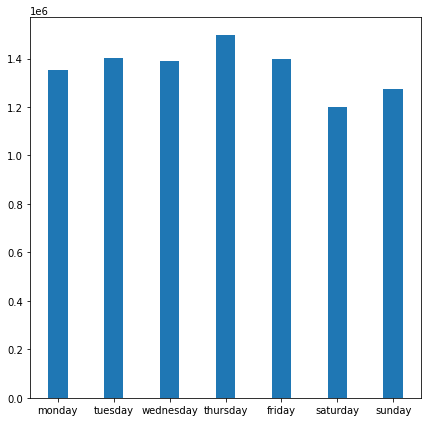

In [86]:
plt.figure(figsize=(7, 7))
plt.bar([week_days[idx] for idx in day_grouped.index], day_grouped["tweet_id"].values, width=0.35)

### Like

In [80]:
positive_like_weekday = df[~df['like_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_like_weekday = df[df['like_timestamp'].isna()].groupby("weekday_tweet_creation").count()

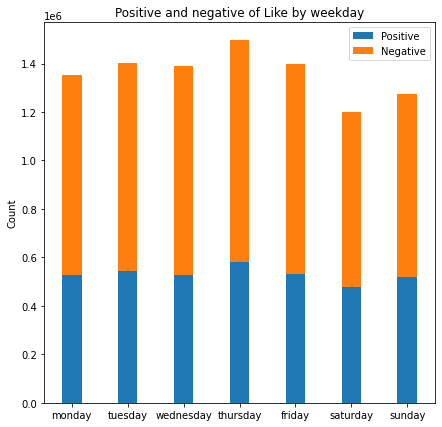

In [91]:
labels = [week_days[idx] for idx in day_grouped.index]

positive = positive_like_weekday["tweet_id"].values
negative = negative_like_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Like by weekday')
ax.legend()

plt.show()

### Reply

In [83]:
positive_reply_weekday = df[~df['reply_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_reply_weekday = df[df['reply_timestamp'].isna()].groupby("weekday_tweet_creation").count()

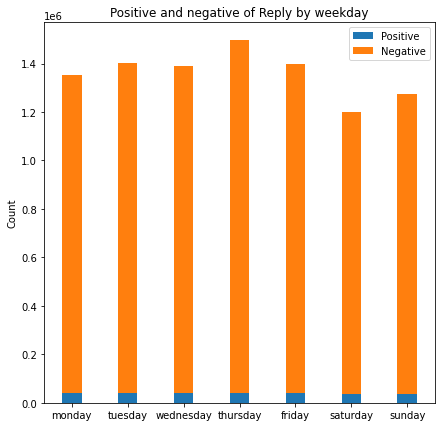

In [92]:
labels = [week_days[idx] for idx in day_grouped.index]
positive = positive_reply_weekday["tweet_id"].values
negative = negative_reply_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Reply by weekday')
ax.legend()

plt.show()

### Retweet

In [88]:
positive_retweet_weekday = df[~df['retweet_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_retweet_weekday = df[df['retweet_timestamp'].isna()].groupby("weekday_tweet_creation").count()

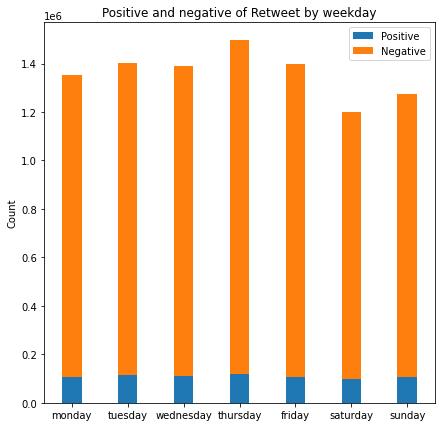

In [93]:
labels = [week_days[idx] for idx in day_grouped.index]
positive = positive_retweet_weekday["tweet_id"].values
negative = negative_retweet_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Retweet by weekday')
ax.legend()

plt.show()

### Quote

In [90]:
positive_retweet_comment_weekday = df[~df['quote_timestamp'].isna()].groupby("weekday_tweet_creation").count()
negative_retweet_comment_weekday = df[df['quote_timestamp'].isna()].groupby("weekday_tweet_creation").count()

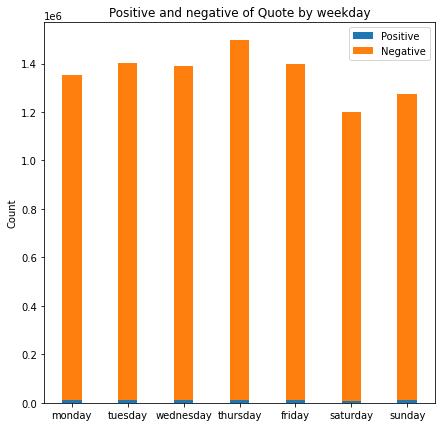

In [94]:
labels = [week_days[idx] for idx in day_grouped.index]
positive = positive_retweet_comment_weekday["tweet_id"].values
negative = negative_retweet_comment_weekday["tweet_id"].values
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


fig.set_figheight(7)
fig.set_figwidth(7)

ax.bar(labels, positive, width, label='Positive')
ax.bar(labels, negative, width, bottom=positive,
       label='Negative')

ax.set_ylabel('Count')
ax.set_title('Positive and negative of Quote by weekday')
ax.legend()

plt.show()

## Histogram of Author users

In [101]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)


C:\Users\adryt\anaconda3\envs\TFM\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AUTHOR_follower_count', ylabel='Density'>

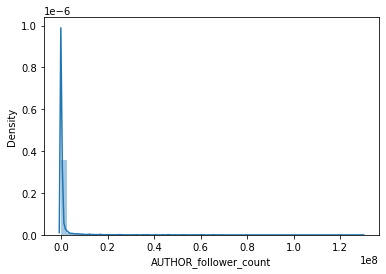

In [102]:
import seaborn as sns
sns.distplot(df["AUTHOR_follower_count"])

(array([9.273838e+06, 1.111930e+05, 5.598700e+04, 3.051300e+04,
        1.792200e+04, 1.128100e+04, 4.458000e+03, 3.251000e+03,
        8.150000e+02, 3.102000e+03]),
 array([1.00000000e+00, 1.29240518e+07, 2.58481026e+07, 3.87721534e+07,
        5.16962042e+07, 6.46202550e+07, 7.75443058e+07, 9.04683566e+07,
        1.03392407e+08, 1.16316458e+08, 1.29240509e+08]),
 <BarContainer object of 10 artists>)

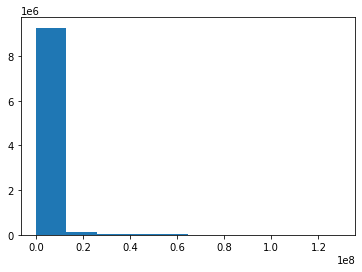

In [96]:
plt.hist(df["AUTHOR_follower_count"])

(array([9.499191e+06, 1.033500e+04, 8.560000e+02, 1.591000e+03,
        2.640000e+02, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.230000e+02]),
 array([      0. ,  425637.1,  851274.2, 1276911.3, 1702548.4, 2128185.5,
        2553822.6, 2979459.7, 3405096.8, 3830733.9, 4256371. ]),
 <BarContainer object of 10 artists>)

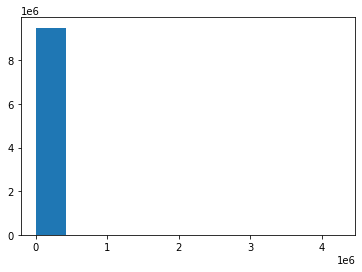

In [97]:
plt.hist(df["AUTHOR_following_count"])

(array([9.512236e+06, 9.200000e+01, 1.500000e+01, 4.000000e+00,
        4.000000e+00, 5.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 2.000000e+00]),
 array([       0. ,  1529363.5,  3058727. ,  4588090.5,  6117454. ,
         7646817.5,  9176181. , 10705544.5, 12234908. , 13764271.5,
        15293635. ]),
 <BarContainer object of 10 artists>)

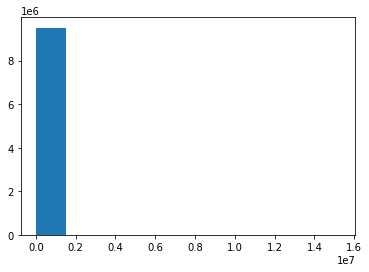

In [98]:
plt.hist(df["INTERACTOR_follower_count"])

(array([9.512287e+06, 3.300000e+01, 3.700000e+01, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([1.000000e+00, 1.605910e+05, 3.211810e+05, 4.817710e+05,
        6.423610e+05, 8.029510e+05, 9.635410e+05, 1.124131e+06,
        1.284721e+06, 1.445311e+06, 1.605901e+06]),
 <BarContainer object of 10 artists>)

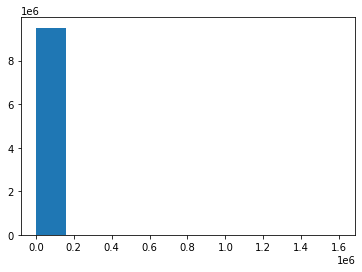

In [99]:
plt.hist(df["INTERACTOR_following_count"])